#Baseline and Package Importing

In [1]:
pip install faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import random
from faker import Faker
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Initialize Faker for generating random data
fake = Faker()

# Menu items
movies = [
    'Top Gun', 'The Avengers', 'Oppenheimer',
    'Interstellar', 'Gatsby', 'The Hangover', 'Seven', 'The Departed',
    'Spider-Man', 'Mission: Impossible'
]

# Function to generate a random list of items
def generate_random_items():
    return ', '.join(random.sample(movies, k=random.randint(1, len(movies))))

# Generate random data
random.seed(17)
data = {
    'User': [random.randint(1, 100) for _ in range(1000)],
    'Items': [generate_random_items() for _ in range(1000)],
    'Date': [fake.date_time_this_decade() for _ in range(1000)],
    'Rating': [round(random.uniform(1.0, 5.0), 1) for _ in range(1000)]
}

# Create DataFrame
df = pd.DataFrame(data)

We import our packages and initialize our faker, which is the tool used to generate our random data. Then we create our items for the random generator, in this case we have 10 movies. After that we start generating our random items, with a random seed assigned so we keep the same data every time we run our code. After that we have some parameters that will cap our rows to 1000, and then we will create our df in order to run our analysis.

In [3]:
df.head(20) #Display the first 20 rows of our dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,User,Items,Date,Rating
0,67,"Spider-Man, Mission: Impossible, Seven, Gatsby...",2021-02-17 01:58:06.377287,4.7
1,54,"Mission: Impossible, Oppenheimer, Gatsby, Top Gun",2023-08-13 00:54:05.412965,2.8
2,39,"Oppenheimer, The Departed, Gatsby, Top Gun, Th...",2020-11-11 07:09:44.041698,3.3
3,47,"Spider-Man, Gatsby, The Departed, Top Gun, Sev...",2022-12-31 07:41:36.154810,3.0
4,38,"The Departed, Oppenheimer, The Avengers, The H...",2020-04-16 16:57:46.493619,1.3
5,23,"Seven, The Departed, Interstellar, Gatsby, Top...",2023-07-30 10:34:28.938318,2.0
6,99,"Interstellar, Oppenheimer, Mission: Impossible...",2022-12-28 22:53:38.419392,3.7
7,91,"Oppenheimer, The Hangover, Mission: Impossible...",2022-05-22 19:47:05.931977,1.6
8,91,"The Avengers, The Departed",2023-02-28 19:04:24.543473,2.2
9,70,"Spider-Man, Seven, Mission: Impossible, Oppenh...",2023-09-20 22:20:06.311853,3.3


We can see the first 20 rows of our dataset, with our columns: User, Items, Date and Rating.

In [4]:
#Convert the 'Items' column to a list of lists
transactions = [item.split(', ') for item in df['Items']]

# Use TransactionEncoder to one-hot encode the transactions
te = TransactionEncoder()
one_hot_encoded = te.fit(transactions).transform(transactions)

# Create a new DataFrame with the one-hot encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


We convert our movies column to an encoded df, in order to analyze the rows where we have a certain title.

In [5]:
one_hot_df.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Gatsby,Interstellar,Mission: Impossible,Oppenheimer,Seven,Spider-Man,The Avengers,The Departed,The Hangover,Top Gun
0,True,False,True,False,True,True,False,True,False,False
1,True,False,True,True,False,False,False,False,False,True
2,True,True,True,True,True,True,True,True,True,True
3,True,True,False,False,True,True,False,True,False,True
4,True,True,False,True,True,True,True,True,True,True
5,True,True,True,True,True,False,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True
7,True,False,True,True,False,False,False,True,True,False
8,False,False,False,False,False,False,True,True,False,False
9,True,False,True,True,True,True,False,False,False,False


This is how the encoded df looks, we have true values for when the movie appears, and false values where it does not.

#Data Preprocessing - Checking Shape, Missing Values, Types

In [6]:
df.shape #Shape of the dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1000, 4)

We check the shape of our df, we have 1000 rows and 4 columns.

In [7]:
df.isnull().sum() #Check for Missing Values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


User      0
Items     0
Date      0
Rating    0
dtype: int64

In [8]:
df.isna().sum() #Check for Missing Values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


User      0
Items     0
Date      0
Rating    0
dtype: int64

We check for missing values and can confirm that we do not have any.

In [9]:
df.dtypes #Check Variable Types

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


User               int64
Items             object
Date      datetime64[ns]
Rating           float64
dtype: object

In [10]:
df['User'] = df['User'].astype('category') #Change the Variable Type of User to Category
df['Items'] = df['Items'].astype('category') #Change the Variable Type of Items to Category

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


After checking for our variable types, we change some of our types to better fit our data. In this case we will change User and Items to a categorical type.

In [11]:
df.dtypes #Check for the Variable Types to Confirm the Change

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


User            category
Items           category
Date      datetime64[ns]
Rating           float64
dtype: object

In [12]:
df.describe() #Get General Information about our Rating (Only Numerical Variable)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Rating
count,1000.000000
mean,3.002800
std,1.164787
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


As we confirm that our variable types have been succesfully changed, we run a quick df.describe to see some descriptive statistics for our rating variable.

#Univariate Analysis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


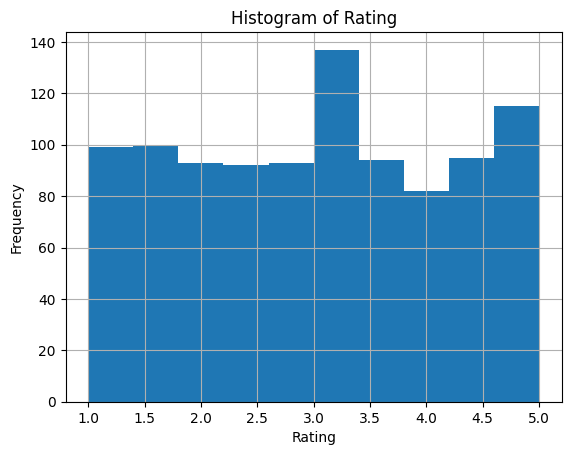

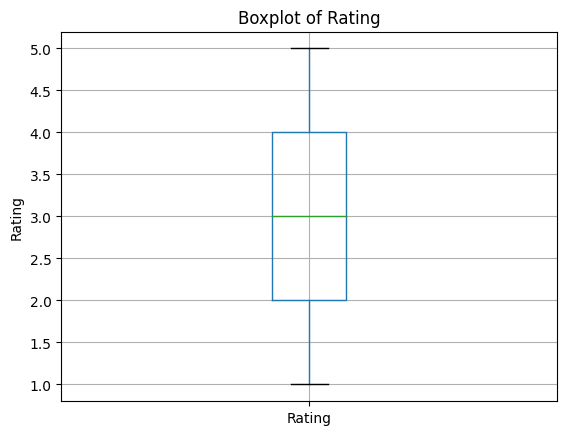

In [13]:
#Create a Histogram of our Data
df['Rating'].hist()
plt.title('Histogram of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

#Create a Boxplot
df.boxplot(column='Rating')
plt.title('Boxplot of Rating')
plt.ylabel('Rating')
plt.show()

For our univariate analysis, we create a histogram were we can see a normal distribution of our ratings, with our mean and mode being a 3.0 rating. When we plot our boxplot, we can see there are no outliers in our data, most likely as our ratings go from 1 to 5. We can confirm here that our mean is 3.0.

#Bivariate Analysis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


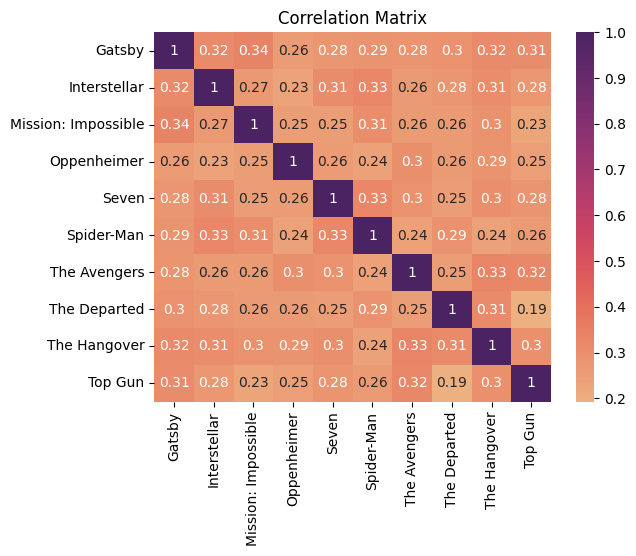

In [14]:
#Create our Correlation Matrix
correlation_matrix = one_hot_df.corr()

sns.heatmap(correlation_matrix, cmap="flare", annot=True)

plt.title("Correlation Matrix")

plt.show()

When we run a correlation matrix for our 10 movies, we cannot see any strong or slight correlations between them. The highest value we can see is a 0.34 between Mission: Impossible and Gatsby. This lack of correlation is probably caused by the quality of our data, which is artificially generated.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


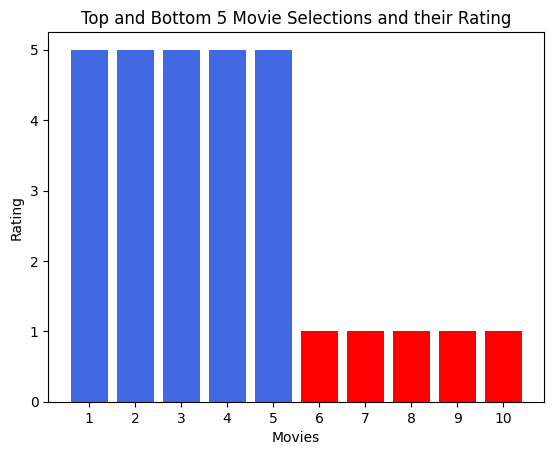

Actual Values:
1. Oppenheimer, Seven, The Hangover, Mission: Impossible, Top Gun, Gatsby, Interstellar: 5.0
2. Oppenheimer, Mission: Impossible, Seven, The Departed, The Avengers, The Hangover, Gatsby, Spider-Man, Top Gun: 5.0
3. The Departed, Spider-Man, The Avengers: 5.0
4. Gatsby, Seven, Spider-Man, Top Gun, The Hangover, Oppenheimer, The Avengers, Mission: Impossible, The Departed: 5.0
5. The Departed, The Avengers, Gatsby, Interstellar, Seven, Oppenheimer, Mission: Impossible, Top Gun, The Hangover, Spider-Man: 5.0
6. Top Gun, The Avengers, Interstellar, Seven, Mission: Impossible: 1.0
7. Gatsby, Seven, Mission: Impossible, Spider-Man, The Hangover, The Avengers, Interstellar, Top Gun: 1.0
8. Interstellar, The Departed, Oppenheimer, The Hangover: 1.0
9. Mission: Impossible, The Departed, The Avengers, The Hangover, Gatsby, Spider-Man, Seven, Oppenheimer: 1.0
10. Mission: Impossible, The Departed, Oppenheimer, Gatsby, Top Gun, Interstellar, Seven, The Avengers, Spider-Man: 1.0


In [15]:
# Select the top 5 and bottom 5 rows based on the 'Rating' column
top_and_bottom_df = pd.concat([df.nlargest(5, 'Rating'), df.nsmallest(5, 'Rating')])

# Create a bar chart with different colors for top and bottom
plt.bar(range(1, 6), top_and_bottom_df.nlargest(5, 'Rating')['Rating'], color='royalblue', label='Top 5')
plt.bar(range(6, 11), top_and_bottom_df.nsmallest(5, 'Rating')['Rating'], color='red', label='Bottom 5')

# Add labels and title
plt.xlabel('Movies')
plt.ylabel('Rating')
plt.title('Top and Bottom 5 Movie Selections and their Rating')

# Set xticks to be numbers from 1 to 10 without any labels
plt.xticks(range(1, 11))

# Show the plot
plt.show()

# Show the actual values on a separate list
print("Actual Values:")
for i, row in enumerate(top_and_bottom_df[['Items', 'Rating']].iterrows(), start=1):
    index, (item, rating) = row
    print(f"{i}. {item}: {rating}")

Here we can see a bar chart that shows the top 5 and bottom 5 ratings from our dataset. As our combinations are really long to show on the chart, we replace them with numbers and then put them as legends on the bottom of the visualization.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


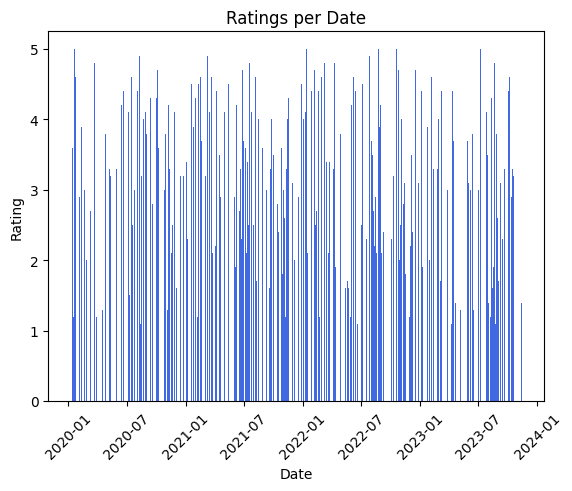

In [16]:
# Create a bar chart with different colors for top and bottom
plt.bar(df['Date'], df['Rating'], color='royalblue', label='Ratings')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Rating')
plt.title('Ratings per Date')

# Set xticks
plt.xticks(rotation=45)

# Show the plot
plt.show()

In order to see if we had any relation between any of our variables, we make another barchart with the ratings and their respective dates. No relation can be seen here.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


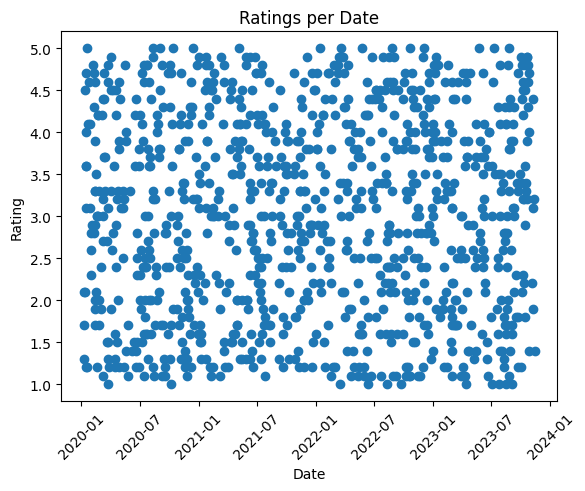

In [17]:
# Create a scatter plot
plt.scatter(df['Date'], df['Rating'])

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Rating')
plt.title('Ratings per Date')

#Adjust the Movie Names
plt.xticks(rotation=45)

# Show the plot
plt.show()

Hoping to see a different result with another type of visualization, a scatter plot is created with the same data. Again, no clear relations can be seen between the rating and the date it was given.

#Multivariate Analysis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


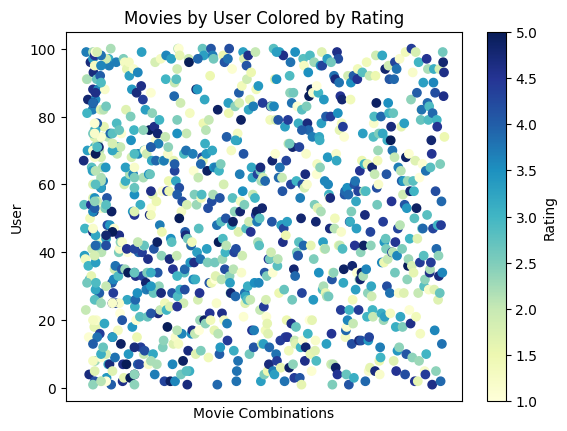

In [18]:
# Create a scatter plot
plt.scatter(df['Items'], df['User'], c=df['Rating'], cmap='YlGnBu', marker='o')

# Add color bar to show z values
cbar = plt.colorbar()
cbar.set_label('Rating')

# Set labels and title
plt.xlabel('Movie Combinations')
plt.ylabel('User')
plt.title('Movies by User Colored by Rating')

#Adjust the Movie Names
plt.xticks([])  # This line hides the x-axis ticks

# Show the plot
plt.show()

For our multivariate analysis, another scatter plot is created. Here we can see the User ID on the y-axis and all of our Movie Combinations on the x-axis; these points are colored by rating and the combination names are not shown because of their lenght. Either way, no clear patterns can be seen here, nor between the users and their ratings, or between the movie combinations.

#Market Basket Analysis

Time to run our market basket analysis. First we run our apriori algorithm, I decided to change the minimum support from 0.03 to 0.1, in order to better filter the data and get better results. Other changes made include changing the order of the frequent_itemsets df to make them show in descending order from the highest to the lowest.

In [19]:
# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(one_hot_df, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

# Sort the frequent_itemsets DataFrame by support in descending order
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

# Display frequent itemsets
frequent_itemsets.head(15)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
8,0.568,(The Hangover)
4,0.565,(Seven)
9,0.558,(Top Gun)
6,0.556,(The Avengers)
1,0.555,(Interstellar)
7,0.551,(The Departed)
5,0.548,(Spider-Man)
3,0.544,(Oppenheimer)
0,0.531,(Gatsby)
2,0.530,(Mission: Impossible)


When displaying the top 15 results from our frequent itemsets list, it is normal to see that our highest supports are the individual movie names, with a support of around 50%-56% on each, followed by the two movie combination in the area of 39%.

In [20]:
#Sort the rules by confidence, lift, and support
rules = rules.sort_values(['confidence', 'lift', 'support'], ascending=False)
pd.set_option('display.max_colwidth', None) #Set the maximum width for column content to be unlimited
rules.head(10) #Display the first 10 rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
40270,"(The Hangover, Gatsby, The Departed, The Avengers, Interstellar, Oppenheimer, Spider-Man, Seven, Top Gun)",(Mission: Impossible),0.119,0.530,0.115,0.966387,1.823371,0.051930,13.982500,0.512560
37637,"(The Hangover, Gatsby, The Departed, Interstellar, Oppenheimer, Spider-Man, Seven, Top Gun)",(Mission: Impossible),0.127,0.530,0.122,0.960630,1.812509,0.054690,11.938000,0.513492
40275,"(Gatsby, The Departed, The Avengers, Interstellar, Oppenheimer, Spider-Man, Mission: Impossible, Seven, Top Gun)",(The Hangover),0.120,0.568,0.115,0.958333,1.687207,0.046840,10.368000,0.462846
39512,"(The Hangover, Gatsby, The Departed, The Avengers, Oppenheimer, Spider-Man, Seven, Top Gun)",(Mission: Impossible),0.137,0.530,0.131,0.956204,1.804159,0.058390,10.731667,0.516483
39517,"(Gatsby, The Departed, The Avengers, Oppenheimer, Spider-Man, Mission: Impossible, Seven, Top Gun)",(The Hangover),0.137,0.568,0.131,0.956204,1.683458,0.053184,9.864000,0.470434
36498,"(The Hangover, Gatsby, The Departed, The Avengers, Interstellar, Oppenheimer, Spider-Man, Seven)",(Mission: Impossible),0.132,0.530,0.126,0.954545,1.801029,0.056040,10.340000,0.512399
38019,"(Gatsby, The Departed, The Avengers, Oppenheimer, Interstellar, Mission: Impossible, Seven, Top Gun)",(The Hangover),0.129,0.568,0.123,0.953488,1.678677,0.049728,9.288000,0.464171
39899,"(The Departed, The Avengers, Interstellar, Oppenheimer, Spider-Man, Mission: Impossible, Seven, Top Gun)",(The Hangover),0.128,0.568,0.122,0.953125,1.678037,0.049296,9.216000,0.463378
34231,"(Gatsby, The Departed, The Avengers, Oppenheimer, Top Gun, Mission: Impossible, Seven)",(The Hangover),0.147,0.568,0.140,0.952381,1.676727,0.056504,9.072000,0.473154
35661,"(The Departed, The Avengers, Oppenheimer, Interstellar, Mission: Impossible, Seven, Top Gun)",(The Hangover),0.138,0.568,0.131,0.949275,1.671259,0.052616,8.516571,0.465950


##Association Rules & Support
In our top 10 association rules we can see a very interesting pattern. The only two movies that appear as consequents are The Hangover and Mission: Impossible; this is impressive considering that our data is entirely random. All our supports are pretty low though with less than 15% on all, which basically means that the probability of those events happening is less than a 15%, which is very low.

##Confidence
In terms of confidence, our highest levels are between 95% and 96%. In simpler words, we can say with 95%-96% confidence that when one of our antecedents happen, the consequent also will. That means that we can also say with those levels of confidence that the respective rules are true.

##Lift
In terms of lift, our values range from 1.7 to 1.8. Lift is a very straightforward assesment, while for confidence levels order matters, it doesn't for lift. This means that when it comes to explaining this, we can say that the associations are positively related, as they are greater than 1. In other words, we can also say that these combinations, no matter the order are 0.7-0.8 times more likely to happen.

##Leverage
This metric is a standardized version of Lift, as it only goes from -1 to 1. In this particular case our values range between 0.05 and 0.06, which tells us that the antecedent and the consequent are almost independent of each other. This means that even though we see the consequent almost every time that the antecedent is present, the frequency of both elements separate is very low.

##Zhangs Metric
Zhangs metric is very useful to interpret how the presence of an element affects the other. In our case the values obtained all range around 0.5. What this tells us is that there is a medium and positive association between the antecedent and the consequent. If we had a negative number here it would tell us that it is not wise to put them together, as they affect each other's presence.

## Bonus: Conviction
This metric tells us how dependent our consequent is from our antecedent. If we have a value higher than 1, which is the case in our data (ranges from 9 to 14), the consequent is dependent on the antecedent. As we have high values here, the data tells us that the consequent obtained is very dependent on the antecedent happening.  

# Final Remarks
Because of the nature of this dataset, which was artificially generated, our results don't really make sense from a logical point of view. Regardless of that, the information obtained from here, and the analysis that was made are a good practice for when a real situation comes up, as we have the experience and knowledge to make the correct interpretations. In terms of this dataset analysis, the following recommendations can be made:
- It seems like The Hangover is the most common results from combining all of our movies, this suggests that in the fictional world where this data comes from, these could be the most neutral movies in terms of genre. This hypothesis can be confirmed if we look at the support of movies as individuals, where The Hangover is the highest value.
- As Mission: Impossible is the most common consequent when it comes to our association rules, we cannot discard it as a popular title, even though it has the lowest support of the individual list. This piece of information is a very good reminder of why it is always useful to conduct in depth analysis when it comes to data science, as results can always surprise us.